<a href="https://colab.research.google.com/github/vbj097/desafio_frexco/blob/main/desafio_frexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão a partir de uma série temporal**


Este conjunto de dados trata-se da vendas realizadas ao longo de 46 dias, de 06/12/2022 à 20/01/2023. Portanto, para esta situação, a modelagem adequada se da por meio de um série temporal, pois as observações são numéricas e ordenadas no tempo.

### **Suposições de uma série temporal**

1. Há um sistema causal relacionado com o tempo, que exerceu influência sobre os dados no passado e pode continuar exercendo no futuro.
2. Variabilidade constante.
3. Estacionariedade.
4. Distribuição normal.

### **Possíveis componentes de uma série temporal**

1. Tendência (crescente ou decrescente)
2. Sazonalidade (padrão ao longo da série)

Se alguma das suposições não forem verificadas ou a existência de algum componente seja detectada, deve-se realizar alguma trasnformções nos dados a fim de corrigir tal inconveniênte.


# Carregando bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
import numpy as np
import statsmodels.tsa.stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from pmdarima.utils import diff_inv
import seaborn as sns

In [ ]:
pip install pmdarima

In [19]:
vendas = [ 870,  868, 1189,  742,  317,  685, 1366, 1213, 1055, 1343,  832,
        240,  235, 1050,  711,  745, 1009,   18,   40,   67,  821,  572,
        429,  638,  106,   54,  144,  814,  679,  712, 1229,  821,  319,
        317, 1317,  807,  923, 1265,  892,  289,  566, 1692, 1097, 1302,
       1405,  945]
dias = pd.date_range('2022-12-06', periods=len(vendas))


# Análise descritiva

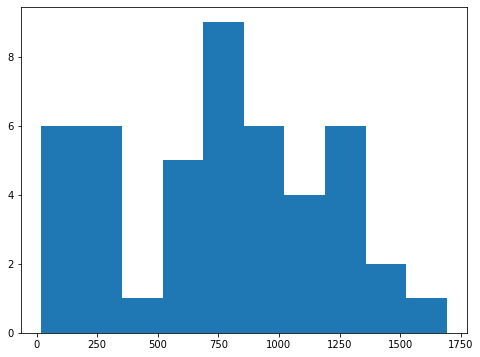

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(vendas)
plt.show()

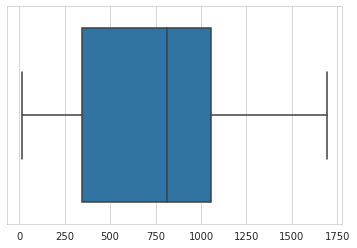

In [30]:
sns.set_style("whitegrid")
sns.boxplot(x = vendas)

Verificando o histograma, percebe-se um distribuição levemente assimétrica. Pelo boxplot é possível observar a assimetria da distribuição e que não há nenhum ponto discrepante (outlier) nos dados. 

In [33]:
df = pd.DataFrame(vendas)
df.describe()

,0
count,46.000000
mean,755.434783
std,430.762201
min,18.000000
25%,346.500000
50%,810.500000
75%,1053.750000
max,1692.000000



Obtendo as medidas resumos, temos a média de vendas é igual à 755.43 e o desvio padrão igual à 430.76 (valor que indíca grande dispersão das observações). 











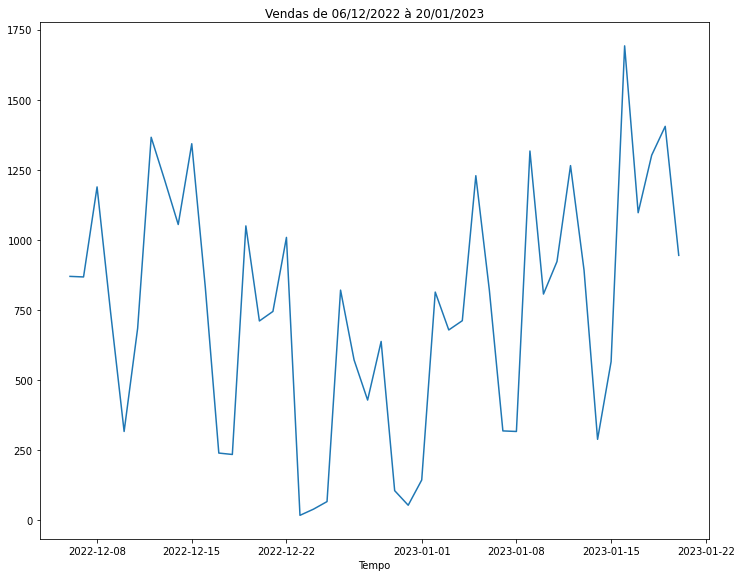

In [22]:
serie = pd.Series(data = vendas, index= dias)
plt.figure(figsize=[12, 9.5]);
plt.plot(serie)
plt.title("Vendas de 06/12/2022 à 20/01/2023")
plt.xlabel('Tempo')
plt.show()

Observando a série, é possível notar que a série não é estacionária, isto é, apresenta um leve crescimento ao longo do tempo, apresenta sazonalidade, ou seja, um certo padrão de repetição ao longo das observações.

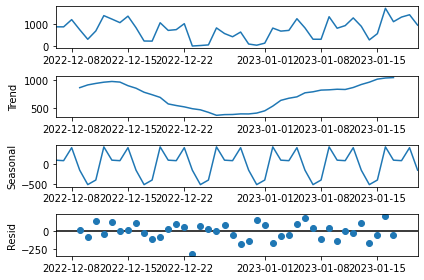

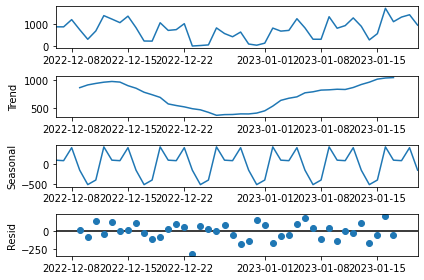

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(serie)
decomposicao.plot()


Pela Figura acima fica evidênte a presença dos diferentes componentes da série temporal (tendência e sazonalidade), além da não estacionariedade. Já a variância aparenta uma certa homocedasticidade (gráfico "resid"), pois os residuos (pontos) estão distribuidos de semelhante em torno de 0. Após alguns testes, foi verificado que a aplicação da diferença entre os elementos foi a transformação mais satisfatória.

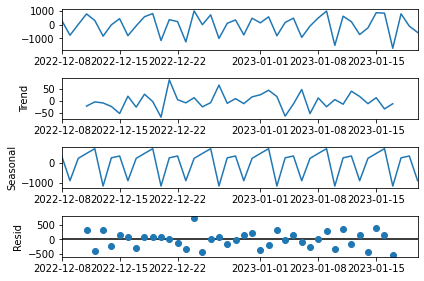

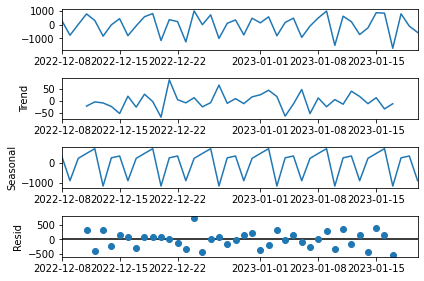

In [34]:
serie2 = pd.Series(data=np.diff(np.diff(serie)), index=dias[2:46])
decomposicao = seasonal_decompose(serie2)
decomposicao.plot()

Pela figura acima, tem-se que a estacionariedade foi verificada e que a sazonalidade poderá ser considerada no modelo, pois mesmo com as transformações continuou presente.

# Identificação do modelo


/usr/local/lib/python3.8/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


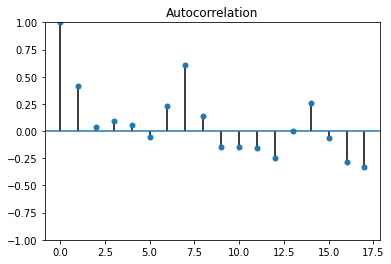

In [173]:
plot_acf(serie)

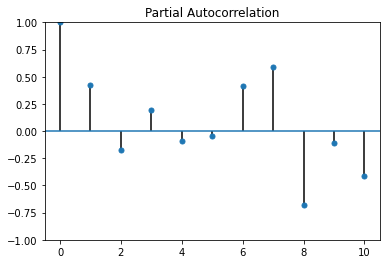

In [178]:
plot_pacf(serie, lags =10)

Observando os gráficos da autocorrelação e da autocorrelação parcial, fica nítido um lenta convergência para 0, indicando que o modelo a ser ajustado será do tipo ARMA. O modelo consiste em duas partes, uma parte auto-regressiva (AR) ou uma parte de média móvel (MA). A parte AR envolve regressar a variável em seus próprios valores defasados, isto é, passados. A parte MA envolve modelar o termo de erro como uma combinação linear de termos de erro que ocorrem contemporaneamente e em vários momentos no passado.

# Modelagem

Após a breve análise descritiva, das suposições e das componentes, finalmente é possível partir para estimação do modelo. Para isto, será utilizado a função 'auto_arima', a qual testa várias possibilidades de modelos e escolhe o melhor com base no critério 'AIC'. O AIC é uma métrica que mensura a qualidade de um modelo estatístico visando também a sua simplicidade, portanto menores valores de AIC representam uma maior qualidade e simplicidade.

In [41]:
modelo = auto_arima(serie2, trace=True, stepwise = True, seasonal=True)
print("AIC obtido: {}". format(modelo.aic()))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=668.692, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=707.521, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=701.452, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=705.530, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=673.775, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 2.666 seconds
AIC ob

In [179]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -328.346
Date:                Thu, 02 Feb 2023   AIC                            668.692
Time:                        06:41:17   BIC                            679.397
Sample:                    12-08-2022   HQIC                           672.662
                         - 01-20-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5501      3.593      1.266      0.205      -2.492      11.592
ar.L1          0.1551      0.227      0.684      0.494      -0.290       0.600
ar.L2         -0.3426      0.246     -1.394      0.163      -0.824       0.139
ma.L1         -1.7465      0.236     -7.388      0.000      -2.210      -1.283
ma.L2          0.7662      0.233      3.285      0.001       0.309       1.223
sigma2      1.649e+05   7.75e+04      2.127      0.033     1.3e+04    3.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.54   Prob(JB):                         0.40
Heteroskedasticity (H):               1.13   Skew:                            -0.09
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como discutido acima, o melhor modelo foi realmente do tipo ARMA, com 2 parâmetros auto-regressivos e 2 parâmetros de média móvel. A forma analitica do modelo predito é:

\
$\hat{y}(t) = 4.5501 + 0.1551x_{t-i}-0.3426x_{t-i}-1.7465\epsilon_{t-i} + 0.7662\epsilon_{t-i} $



## Análise de residuos

Para garantir a eficácia do modelo predito é necessário que ele atenda algumas suposições a cerca dos residuos:



1. Normalidade
2. Independência
3. Variância constante.



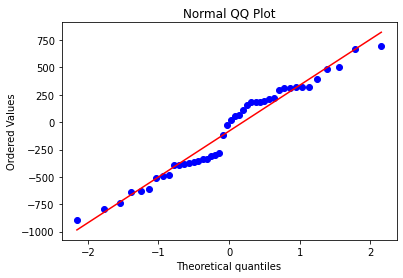

ShapiroResult(statistic=0.9129071831703186, pvalue=0.0024514603428542614)

In [43]:
residuos = modelo.resid()

stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal QQ Plot')
plt.show()

#teste de aderência à distribuição normal
stats.shapiro(diff_inv(residuos))

Verificando o gráfico normal probabilisticos, percebe-se que os residuos estão próximos à linha teórica, ou seja, indicativo de normalidade. Já pelo resutado do teste de aderência à distribuição normal ('Shapiro wilk'), como o p-valor obtido foi pequeno, também há indicativo de que a distribuição dos residuos é normal.

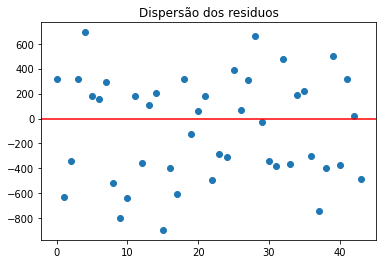

In [57]:
x = range(0,len(residuos),1)
plt.scatter(x,residuos)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.title("Dispersão dos resíduos")
plt.show()

Pelo gráfico de dispersão dos resíduos é possível verificar a independência, pois a nuvem de pontos está distribuida de forma aleatória e é possível confirma a variabilidade constante, porque a nuvem de pontos está distribuida igualmente em torno do 0 (com exceção de 2 ou 3 pontos).

# Previsão

Após estimar o modelo e verificar suas suposições é possível realizar as previsões.

In [108]:
pred = modelo.predict(n_periods=6)

#reajustando a escala
d = pd.date_range('2023-01-20', periods=len(pred)+1)
p = pd.DataFrame(diff_inv(pred), columns=['Previsão'])
p.insert(0,"data", d)
p = p.drop(p.index[0])
p

,data,Previsão
1,2023-01-21,817.306518
2,2023-01-22,768.703284
3,2023-01-23,485.706348
4,2023-01-24,463.002317
5,2023-01-25,560.983806
6,2023-01-26,588.513508


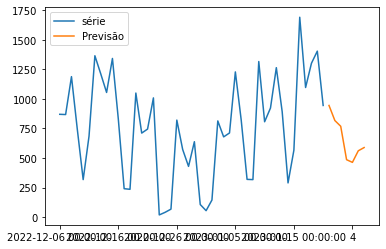

In [106]:
prev = pd.DataFrame(diff_inv(pred), columns=['Previsão'])
prev.loc[0]=945 
a = pd.concat([serie,prev])
a=a.rename(columns={0:'série'})
a.plot()

# Desempenho do modelo

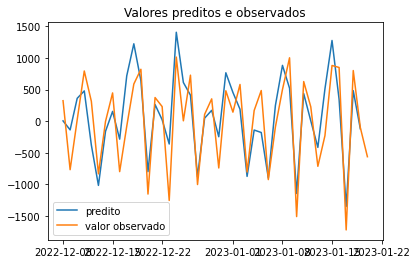

In [163]:
v_predito = modelo.predict_in_sample(start=0, end=42)
plt.plot(v_predito)
plt.plot(serie2)
plt.title("Valores preditos e observados")
plt.legend(['predito', 'valor observado'])
plt.show()

Verificando de forma gráfica, comparando os valores observados com os valores preditos pelo modelo, é possível notar que o modelo estimado se ajustou de forma relativamente bem aos dados.

# Considerações Finais

É preciso salientar que para modelagens e previsões mais precisas seria necessário um tamanho amostral maior, pois poderia ser realizada validação cruzada do modelo estimado, no qual separaria partes dos dados para estimação e parte para verificação do desempenho do modelo (treinamento e teste). Contudo, nas condições apresentadas, os resultados obtidos foram razoávelmente satisfatórios.